[Reference](https://medium.com/the-modern-scientist/efficient-learning-through-layers-exploring-hierarchical-sparse-representations-in-deep-neural-552fb41eed80)

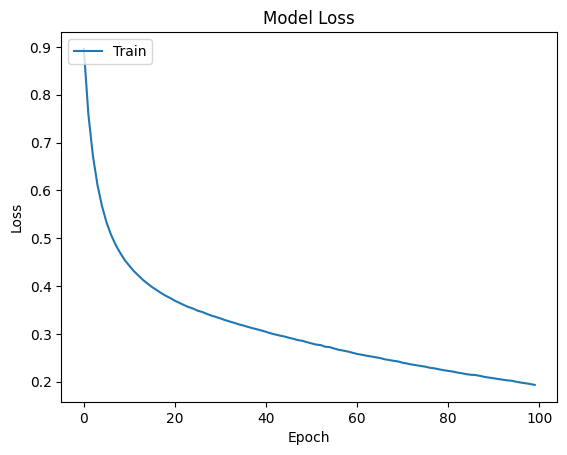

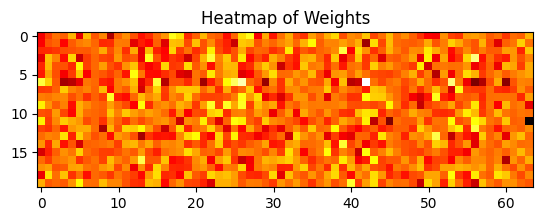

Sparsity in weights: 0.00%


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l1
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=0, n_classes=2, random_state=42)

input_layer = Input(shape=(20,))
sparse_layer = Dense(64, activation='relu', activity_regularizer=l1(0.01))(input_layer)
output_layer = Dense(1, activation='sigmoid')(sparse_layer)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X, y, epochs=100, batch_size=32, verbose=0)

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

weights = model.layers[1].get_weights()[0] # Get weights of the sparse layer
plt.imshow(weights, cmap='hot', interpolation='nearest')
plt.title('Heatmap of Weights')
plt.show()

non_zero_weights = np.count_nonzero(weights)
total_weights = weights.size
sparsity_percentage = (1 - non_zero_weights / total_weights) * 100
print(f"Sparsity in weights: {sparsity_percentage:.2f}%")